### Notebook for [Biodatascience101.github.io](https://biodatascience101.github.io) - Simple and effective biological data science training
### By [Magnus Haraldson Høie](https://twitter.com/magnushoie) and [Andreas Fønss Møller](https://github.com/foenssmoeller)

# Visualization of sequence data

## Learning objectives

This notebook is designed to give users an introduction to: 

- Processing of amino-acid sequence data

- Efficient data handling and numerical computing using NumPy

- Data visualization in Python using SeaBorn

- Visualizing dataset distributions, frequencies and correlations

- Python Matplotlib figure interaction, manipulation and customization


Users will after this notebook be able to:

- Import and process sequence data using NumPy

- Use advanced python features to efficiently transform and manipulate sequence data

- Make effective and compelling data visualization graphs that clearly convey scientific messages


# Case study:
## Sequence analysis of micro-organisms at different optimal growth temperatures

Proteins are important biomolecules, absolutely vital for life. 
They perform vital cellular functions, from cellular transport to catalysis of chemical reactions. 

The properties of proteins are largely dependent of their chemical composition and their structure. Thus, loss of protein stability or its native structure can lead to loss of their function. 

Several chemical and physical factors (e.g. pH, heat, ions) influence protein conformation. 

Proteins usually have an optimal range of temperatures, at which they operate efficiently. At temperature levels above this, enzymatic activity may increase but proteins are at increasing risk of denaturation and loss of their function, while temperatures lower than the optimum generally leads to lower enzymatic activity.

The activity of proteins are therefore highly dependent on the state of the system that they are in. 




<img src="img/denatur.png" width="800" />

**Protein temperature-based denaturation. Source: Scurran15 - Own work - 1 June 2015. URL: https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Process_of_Denaturation.svg/640px-Process_of_Denaturation.svg.png**

From a biotechnological or biopharmaceutical perspective, proteins should be engineered to have a close to optimal performance at the physical specifications of the intended system. For example, enzymes used as detergents must have a good performance in water at 30 - 40 degrees. 

Predicting features of proteins that are thermostabile at a given temperature, is therefore of great interest to e.g. the biotech and pharmaceutical industry.

<img src="img/opi_grow.png" width="500" />
    
**Trade-off between protein enzymatic activity and stability. Source: Thomas Shafee - Own work - 9 March 2016. URL: https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Q10_graphs.svg/800px-Q10_graphs.svg.png?1578145290717**
 

#### Dataset description

To demonstrate data visualization and graphing techniques in Python using Seaborn, we are going to use a subset of a "Protein Heat Resistance" dataset from Kaggle. 

<img src="img/module2.png" width="500" />

The full dataset can be accessed through:

www.kaggle.com/igempotsdam/protein-heat-resistance-dataset

Our subset contains 10.000 protein sequences (~7.7 million protein sequences in the full dataset). For all protein sequences in the dataset, the iGEM Potsdam team have associated an optimal growth temperature of the source organism (the observed temperature at which cells of that organism had the highest growth rate). The temperature data was sourced from the BacDive, Bacterial Diversity Metadatabase (https://bacdive.dsmz.de, (1)) and bacterial protein sequences from UniProt (https://www.uniprot.org, (2)).

The dataset description is as follows:

The data consists of the sequences of the proteins as input and the growth temperature as target. The sequences are coded as numbers from 0 to 20. The numbers 1-20 relate to the canonical amino acids, which are present in every cell. The class 0 encodes "None": Note that protein sequences vary in length. Therefore shorter sequences will have many zeros at the end. The dataset contains 7.708.771 sequences and temperatures.

**Source: https://www.kaggle.com/igempotsdam/protein-heat-resistance-dataset**

**1. BacDive in 2019: bacterial phenotypic data for High-throughput biodiversity analysis Reimer, L. C., Vetcininova, A., Sardà Carbasse, J., Söhngen, C., Gleim, D., Ebeling, C., Overmann, J. Nucleic Acids Research; database issue 2019.**

**2. The UniProt Consortium UniProt: a worldwide hub of protein knowledge Nucleic Acids Res. 47: D506-515 (2019)**

#### NumPy

The NumPy library is one of the pillars of scientific computing. 

For our needs NumPy provides:

- Powerful data structures (most notably N-dimensional arrays)
- A large set of tools for manipulating data in matrices or arrays
- High performance linear algebra and arithmetic functions 

We will, during this exercise, use Numpy arrays as a very memory and computationally efficient container for handling our sequence data, instead of Pandas DataFrames which in this case would suffer from far longer processing times.

**A Numpy quickstart tutorial can be found here:
https://numpy.org/devdocs/user/quickstart.html**

**Read more: https://numpy.org**

#### Numpy arrays vs Pandas DataFrames
**The Pandas library and its Pandas dataframe implementation** are built on top of numpy arrays, providing a level of abstraction and is used for handling tabular data, analysis and cleaning. Pandas dataframes usually have explicit row and column names that must be defined. The Pandas library also provides a large set of tools for data alignment, statistics and joining functions. However it can only handle 1 dimensional series or 2 dimensional dataframes.
 
**Numpy arrays** do not have any row or column names. However, numpy arrays can handle any N-dimensional data by ordering them in N-dimensional arrays or "matrices" of any given number of dimensions. The Numpy library is optimized for  efficient memory access and computations on its arrays. Due to this, it is not uncommon to observe a significant speed increase when working with numpy arrays vs pandas dataframes (1).


**Note 1: Numpy vs Pandas can provide Speed-ups of up to 10 - 100x faster and with up to 1 / 3 memory requirements.
Read more: http://gouthamanbalaraman.com/blog/numpy-vs-pandas-comparison.html**

## Library import

Below we will import a series of libraries which will be used to run the code we will need for the analysis

In [1]:
# Data science libraries
import pandas as pd
import numpy as np

# Plotting libraries
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# This is a custom script which gives intended coloring to cells in this notebook
from scripts.noteStyle import set_styles, background
set_styles()

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
#Show matplotlib graphs directly in jupyter notebook
# Allow reloading of scripts
# Automatically reload scripts if they change

#### Loading data

The data has already been processed and saved as numpy files using **np.save**.
We can recognize this from the .npy file extension. In order to load the files we use the **np.load** function.

(https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html)

Since the data comes from a Kaggle machine-learning competition, the data is stored as two files.
- X_data: All samples with their training data features (sequences in numeric format)
- y_data: The target value those samples represent (source organism optimal growth temperatures in celsius)


In [3]:
#%time
X_data = np.load("data/sequences10k_X.npy")
y_data = np.load("data/sequences10k_y.npy")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


#### Note: Here we use the [Jupyter Magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) function %time in order to observe the processing time it takes to load our 10 000 sequences. The original dataset is 7.7 million sequences. 

#### Let´s quickly get an overview of the data we have loaded by looking at an individual sample, the numpy array shapes and use the Pandas .describe method.



In [4]:
# Check the type of the object we loaded, which should be Numpy arrays
type(X_data), type(y_data)

(numpy.ndarray, numpy.ndarray)

In [5]:
# Looking at the first sequence
X_data[0]

array([11,  1,  9,  9, 16,  9,  8,  1, 15, 12,  4, 14, 15,  9, 18,  8, 18,
        4, 15, 20,  1,  4, 15, 15,  1,  4, 10,  9,  9, 17, 10, 18,  3, 13,
       12,  1, 17,  3,  4,  1, 15,  4,  1,  1, 15, 18,  6, 10, 14,  9, 10,
       13, 15, 12,  1, 16, 13,  1, 15, 18, 15, 16, 15,  3, 18,  8,  3,  6,
       15, 13, 15,  6, 18, 10, 17,  9,  5,  6,  8, 16, 15, 18, 15,  5, 15,
        3, 11,  1,  7, 15,  6,  4, 10, 13,  6, 18, 17,  9, 16, 16, 19,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [6]:
y_data[0]

28.0

In [7]:
X_data.shape, y_data.shape

((10000, 650), (10000,))

#### Question 1: What is the maximum length of each protein in the dataset?

**Having checked the above functions, and having read the dataset description, we can now identify that:**
- The type of our two objects are numpy arrays as expected
- The first sequence of X_data consists of what seems to be amino-acids in numerical format of length 650, with 0´s representing missing residues
- The first item of y_data is a temperature in Celsius
- The dimensions of X_data and y_data is
        1) An array of 2 dimensions: 10 000 rows, 650 columns
        2) An array of 1 dimension: a vector of 10 000 items

#### Exercise:
    
Using knowledge from the previous session about slicing 2-dimensional arrays (or pandas dataframes), try to slice only the **first 2 amino acids from all (10 000) sequences** in X_data.

#### Running the Pandas [.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method on our Numpy array
The Pandas .describe method will work in 2 separate ways, depending on the type of data in the DataFrame it is run on. It can either interpet the data numerically (if it reads floats or integers), or it can interpret the data categorically (if it reads strings or a non-numerical format)

**If it is interpreted numerically, the 2nd amino acid will be interpreted as having twice the value of the 1st, and so on for all amino acids. This does not make biological sense.**

**If it is interpreted categorically, it will treat all amino-acids as separate categories, and can give us the per-position frequency, top occuring amino-acid and number of unique amino-acid per position.**

We will try both methods.

**Note that in order to use the pandas [.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, we first need to convert the numpy array into a Pandas DataFrame, as shown here.**



In [9]:
# 1. Convert the numpy array X_data to a Pandas DataFrame,
# 2. Run the .describe method on the DataFrame
pd.DataFrame(X_data).describe()

,0,1,2,3,4,5,6,7,8,9,...,640,641,642,643,644,645,646,647,648,649
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.002000,10.725300,10.38200,10.637800,10.503500,10.450200,10.394300,10.046200,10.013600,9.957000,...,0.05160,0.041900,0.049300,0.04480,0.030400,0.024100,0.017400,0.012900,0.010200,0.008700
std,0.340599,5.387926,5.41522,5.361015,5.363568,5.382102,5.472625,5.525334,5.573663,5.617464,...,0.81707,0.745117,0.829662,0.79916,0.618639,0.563871,0.483033,0.400187,0.353707,0.343564
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,7.000000,6.00000,7.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,11.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,16.000000,15.00000,16.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.00000,19.000000,20.000000,20.00000,18.000000,20.000000,20.000000,18.000000,18.000000,18.000000


- count gives us the total number of items per column
- mean is the average value across the column
- std, min, max and 25-75% represents the standard deviation, minimum value, maximum value and the quartiles for all values in the column

**We can observe that:**
- The 20 amino-acids are represented as integers between 0 and 20, where 0 represents a missing residue.
- There are 10 000 items per position, and that the average value of each position is 11.
- The minimum value for the first 9 positions is 0, while for the last 10 positions it is 0.
- The average value for the last 10 positions is extremely low, indicating most sequences have no residues in those positions (are shorter than 650 residues)

#### Note:
    
**Because the pandas describe method is interpreting the residues as numerical values, and not as categorical items, the summary seen above is not very useful for finding out how many unique residues there is per position, or which residue is most over-represented.**

In order for the .describe method to recognize the integers as categorical values (integers representing residues) as opposed to continuous numerical values, we need to convert our data to text-based strings. We do this using the Pandas **[.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)** method on our Pandas DataFrame.

In [10]:
# 1. Convert the numpy array X_data to a Pandas DataFrame,
# 2. specify the dataframe contents as strings,
# 3. Run the .describe method

pd.DataFrame(X_data).astype(str).describe()

,0,1,2,3,4,5,6,7,8,9,...,640,641,642,643,644,645,646,647,648,649
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,13,20,20,20,20,20,20,20,20,20,...,19,17,18,19,16,14,13,11,10,6
top,11,16,9,10,10,10,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0
freq,9967,1264,1085,1105,1158,1206,1183,1124,1201,1182,...,9948,9958,9959,9962,9970,9975,9981,9984,9987,9993


- The unique row tells us the number of unique amino-acids observed across the 10000 sequences.
- Top is the amino-acid with the highest frequency
- Freq is the frequency for the top occuring amino-acid

**We can observe that:**
- The top amino-acid for the first position for the first position is 11, occuring an incredible 9967 times (99.67 % of the time). The 11th residue in an alphabetically sorted amino-acid list starting from Alanine, would be **[Methionine, representing the most common start codon](https://en.wikipedia.org/wiki/Methionine#Encoding).**
- The top occuring amino-acid for positions 2-10 (ordered 1 to 9 as Python numbering starts at 0), occurs ca 12 % of the time.
- The most common residue for most positions after the first 3 is 10, representing Leucine, **[one of the most common amino-acids in UniProtKB (*)](https://web.expasy.org/docs/relnotes/relstat.html)**

(*) Reference: "6.1  Composition in percent for the complete database", UniProtKB/Swiss-Prot protein knowledgebase release 2020_01 statistics, ExPasy Bioinformatics Resource Portal, March 2020.

#### Note:
    
**We will create and show a numerical list of which numbers correspond to which amino-acids in alphabetical order just below.**

In order to convert these numbers to a more meaningful, human-readable sequence, we will need to write a function that for a single sequence, takes its integers as input and returns the correct amino-acid for a given position position.

#### Question 2: How many unique amino acids are found in the first position of all proteins in the dataset?

### Python Dictionaries for translating
In order to map or translate between the amino-acids´ integer values and their corresponding letters, we will use a [Python dictionary](https://realpython.com/python-dicts/) (official documentation [here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)). 

A python dictionary is a data structure and method that maps a **key** (e.g. the word or value one wishes to look up) to a **value** (what that word maps to).

#### Note: A key can only map to one value, but that value can be any python object including a list, tuple or even an array or dataframe. Python does this very efficiently by using hash tables 

Using **{}** or **dict()** initializes a new, empty dictionary. We can then fill this dictionary with our amino-acid integers as keys, and the corresponding amino-acid letter as values. This is done using:

**dict[key] = value**

We will create a range called aa_integers with the integers from 1 to 20.

Using the built in function zip, we iterate over aa_integers and aa_residues at the same time.

The zip function takes multiple iterators and return an iterator of tuples with the first, second and third element of each iterator together, as:

In [12]:
# Dictionaries are made as such:
a_dict = {'A':1, 'B':2, 'C':3}
# Values kan the be accessed using the keys
a_dict['B']

2

In [13]:
#The zip finction works as follow:
letters, numbers = ['A','B', 'C'], [1,2,3]
[*zip(letters, numbers)] # * is used to unpack

[('A', 1), ('B', 2), ('C', 3)]

In [14]:
# Python dictionary method
aa_dict = {}
aa_residues = list("ACDEFGHIKLMNPQRSTVWY")
aa_integers = range(1, 21)

# Iterate over the 20 integers and their amino-acid residue equivalent
# And assign those to a aa_dict
for integer, aa in zip(aa_integers, aa_residues):
    aa_dict[integer] = aa
    
aa_dict

{1: 'A',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'K',
 10: 'L',
 11: 'M',
 12: 'N',
 13: 'P',
 14: 'Q',
 15: 'R',
 16: 'S',
 17: 'T',
 18: 'V',
 19: 'W',
 20: 'Y'}

We can access any key in the dictionary and find its value. For example we can find out what the most common amino-acid in the first position of our sequences is, namely integer 11, by running the below command:

#### Question 3: Which amino-acid residue does the key 19 correspond to?
    

We can see that the integer 11 represents the residue Methionine.

<a href="img/Amino_Acids.png"><center> <img src="img/Amino_Acids.png" alt="Drawing" style="width: 500px;"/> <center/><a/>

**Source: "Amino acids" by Dancojocari - Own work - January 2010. URL: https://commons.wikimedia.org/wiki/File:Amino_Acids.svg**


#### Building the numerical to string amino-acid converter function

Using the python dict, we now have a way to convert directly from integers to the correct amino-acid letter. Now we just need to define a function which:
- 1. Takes an input sequence
- 2. Finds and remove the missing positons (denoted by "0")
- 3. Iterates over the sequence, converting all integers into their equivalent residues
- 4. Returns a string of the resulting amino-sequence

### Python functions

Functions are a set of instructions that can be re-applied several times. This allows you to only write /edit code once to implement behavior. 

A function is defined as such:


def function_name(parameters):

    function_body
    
    return something



In [17]:
def numeric_to_aa(numeric_sequence):
    #First find and remove the missing positions
    missing_positions = np.where(numeric_sequence == 0)[0]
    numeric_sequence = np.delete(numeric_sequence, missing_positions)
    
    #Next convert the numeric sequence to the amino-sequence using aa_dict
    amino_sequence = np.array([aa_dict[aa] for aa in numeric_sequence])
    
    #Finally convert the numpy array of amino-acids to a single string
    amino_sequence_string = "".join(amino_sequence)
    return amino_sequence_string

In [18]:
# Testing the function on the first sequence in the dataset
numeric_to_aa(X_data[0])

'MAKKSKIARNEQRKVIVERYAERRAELKKTLVDPNATDEAREAARVGLQKLPRNASPARVRSRDVIDGRPRGVLTKFGISRVRFRDMAHRGELPGVTKSSW'

#### Note: There is also a [BioPython package](https://biopython.org/), [Polypeptide](https://biopython.org/DIST/docs/api/Bio.PDB.Polypeptide-module.html), which achieves the same.

#### Great! Everything seems to be working

#### Question 4: Using the dictionary, map the following sequence to its translated amino-acid string: [3, 1, 17, 1, 16, 2, 8, 4, 12, 2, 4]
    
    

Now let´s convert all our numerical sequences to their letter sequences

In [21]:
# Create new empty list named sequences
sequences = []

# Iterate over first 1000 sequences in dataset
for seq in X_data[0:1000]:
    
    # Convert each sequence to amino-sequence,
    # and append to sequences list
    sequences.append(numeric_to_aa(seq)[0:11])
    
# Show first 10 sequences in list
sequences[0:10]

['MAKKSKIARNE',
 'MYARTLLLAVI',
 'MLVKTYCAAVN',
 'MKKTLSAIANW',
 'MKLNCDMGESF',
 'MFNKIQSKLHK',
 'MDKKIKKIDRA',
 'MSYLAIKHIHM',
 'MKTTLITVAGL',
 'MSELLEYLDML']

#### Note: In Python, positions start at 0, not 1. Also, the last item in the slice 0:11 is not included, meaning only items 0 to 10 will be returned

In [22]:
# Save sequences list to new file, sequences.txt

# Open a new file called sequences.txt in writing mode
with open("sequences.txt", "w") as infile:
    
    # Iterate over sequences list
    for seq in sequences:
        
        # Text = string of sequence, with a newline
        text = str(seq) + "\n"
        
        # Write each sequence text to file (sequences.txt)
        infile.write(text)

#### Note: It is also possible to save the sequences list directly as a Python list, using [Pickle](https://wiki.python.org/moin/UsingPickle):

In [23]:
import pickle 
pickle.dump(sequences, open("sequences.pickle", "wb")) 
loaded_sequences = pickle.load(open("sequences.pickle", "rb"))

## Protein sequence and Optimal Growth Temperatures

Let´s continue investigating our dataset, and look at the **y_data** optimal growth temperatures

In [24]:
#%%time
pd.DataFrame(y_data).describe()

CPU times: user 6.52 ms, sys: 3.53 ms, total: 10.1 ms
Wall time: 42 ms


,0
count,10000.000000
mean,34.742852
std,12.670174
min,4.000000
25%,28.000000
50%,30.000000
75%,37.000000
max,103.000000


**y_data** represents the optimal growth temperatures for the organisms which the protein was sourced from. We see a distribution from 4 to 103 degrees Celsius, with a mean of 34.7 degrees.

#### Let´s start plotting!

We can easily plot the distribution of a set of values using **[Seaborn´s distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)** method. This will allow us to easily create a histogram of frequency along with an estimated density across all temperatures. We can then identify which temperatures are most common in the dataset.

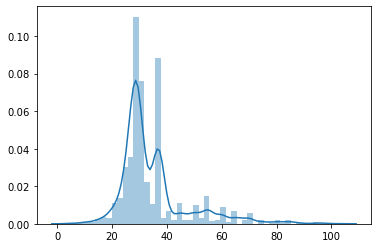

In [25]:
sns.distplot(y_data, kde_kws={'bw':2})

Let´s make the figure size a little larger, and add axis labels and a title

Text(0.5, 1.0, 'Distribution of optimal-growth temperatures')

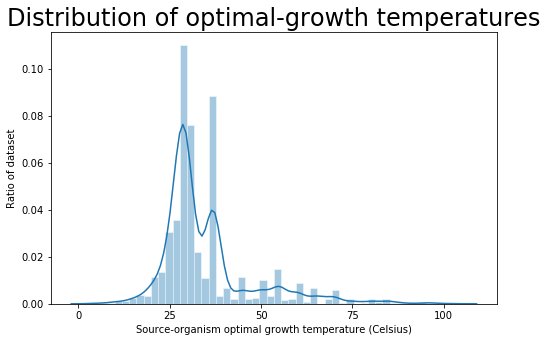

In [26]:
# Set figure size and font scale for entire figure
fig, ax = plt.subplots(figsize = (8,5))
sns.set(font_scale=2)

# Plot graph from y_data
sns.distplot(y_data, kde_kws={'bw':2})

# Add labels and title
ax.set_xlabel('Source-organism optimal growth temperature (Celsius)')
ax.set_ylabel('Ratio of dataset')
plt.title('Distribution of optimal-growth temperatures')


#### Extracting datapoints directly from plot

We see a large overrepresentation of sequences at specific temperature values. We can extract the data directly from the plot using matplotlibs **[.get_xdata() and .get_ydata()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D.html?highlight=get_xdata#matplotlib.lines.Line2D.get_xdata)** functions.

We can then analyze the extracted data, annotate it, and graph it again.

In [27]:
x_values = ax.lines[0].get_xdata() # Get the x data of the distribution
y_values = ax.lines[0].get_ydata() # Get the y data of the distribution

print("Temperatures extracted:")
x_values

Temperatures extracted:


array([ -2.        ,  -1.12598425,  -0.2519685 ,   0.62204724,
         1.49606299,   2.37007874,   3.24409449,   4.11811024,
         4.99212598,   5.86614173,   6.74015748,   7.61417323,
         8.48818898,   9.36220472,  10.23622047,  11.11023622,
        11.98425197,  12.85826772,  13.73228346,  14.60629921,
        15.48031496,  16.35433071,  17.22834646,  18.1023622 ,
        18.97637795,  19.8503937 ,  20.72440945,  21.5984252 ,
        22.47244094,  23.34645669,  24.22047244,  25.09448819,
        25.96850394,  26.84251969,  27.71653543,  28.59055118,
        29.46456693,  30.33858268,  31.21259843,  32.08661417,
        32.96062992,  33.83464567,  34.70866142,  35.58267717,
        36.45669291,  37.33070866,  38.20472441,  39.07874016,
        39.95275591,  40.82677165,  41.7007874 ,  42.57480315,
        43.4488189 ,  44.32283465,  45.19685039,  46.07086614,
        46.94488189,  47.81889764,  48.69291339,  49.56692913,
        50.44094488,  51.31496063,  52.18897638,  53.06

#### Exercise: Sort the extracted temperatures (x_values) in reverse order using np.sort and print them. https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html

In [28]:
print("Sorted temperatures extracted:")
# ?

Sorted temperatures extracted:


We can also plot the newly extracted points:

Text(0.5, 1.0, 'Extracted datapoints')

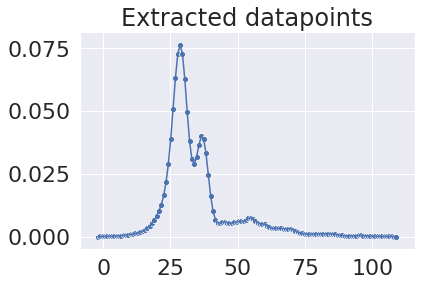

In [29]:
sns.lineplot(x_values, y_values)
sns.scatterplot(x_values, y_values)
plt.title('Extracted datapoints')

We can use the extracted datapoints in order to investigate which temperatures are the most overrepresented in the dataset.

First we will find all the temperatures which represent by themselves more than 5 % of the total dataset (where the y coordinate or ratio of the dataset is over 0.05)

In [30]:
top_points = np.where(y_values > 0.05)
top_x_values = x_values[top_points]
top_y_values = y_values[top_points]

top_x_values, top_y_values

(array([25.96850394, 26.84251969, 27.71653543, 28.59055118, 29.46456693,
        30.33858268]),
 array([0.05075348, 0.06304767, 0.07268139, 0.07643244, 0.07270994,
        0.06267848]))

#### Next we add these data points back to the original plot as label texts

10

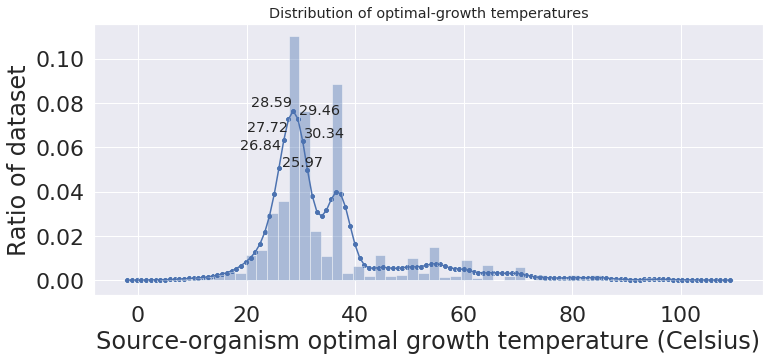

In [31]:
fig, ax = plt.subplots(figsize = (12,5))
sns.set(font_scale=1.2) # Adjust this to change the fontsize of all text

sns.distplot(y_data, kde_kws={'bw':2})
sns.scatterplot(x_values, y_values)
ax.set_xlabel('Source-organism optimal growth temperature (Celsius)')
ax.set_ylabel('Ratio of dataset')
plt.title('Distribution of optimal-growth temperatures')

# Create label texts
label_text = np.round(top_x_values, 2)

texts = [plt.text(top_x_values[i],
                  top_y_values[i],
                  label_text[i],
                  ha='center',
                  va='center')
         for i in range(len(top_x_values))]



from adjustText import adjust_text
adjust_text(texts)

#### Note: adjustText is a "small library for automatically adjustment of text position in matplotlib plots to minimize overlaps." by Ilya Flyamer (Phlya). It allows us to add labels to the plotted points without the text overlapping. Read more: https://github.com/Phlya/adjustText

## Investigating sequence length

In order to count the length of the sequences, we need to count the number of positions per sequence which are not 0.

This can be easily done using a combination of a python equality statement (x == y) and numpy´s .sum function across one dimension/axis of a numpy array.

- Python logical and other operators: https://www.w3schools.com/python/python_operators.asp
- Numpy .sum: https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html

In [32]:
np.sum([True, True, True, False, False])

3

#### Note: We can find all the non-missing positions in the sequences by finding all items which are NOT 0. This will return a list of True and False booleans, which are also represented as 0 and 1. We can then sum this list to count the number of True / 1 items, which gives us the length of the sequence excluding missing positions

In [33]:
# Take the length of the non-zero values in the sequences
lengths = (X_data != 0).sum(axis = 1)
lengths

array([101, 137, 513, ..., 146, 410, 161])

Now that we have gathered the lengths of the different sequences we can use this information to get a visualization of the length distribution. We will use the **[.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)** method again

We can use seaborn´s global **[.set](https://seaborn.pydata.org/generated/seaborn.set.html)** function in order to set the font scale for all fonts in the graph. This will be remembered for all future graphs as well, unless changed again.

Text(0.5, 1.0, 'Sequence length')

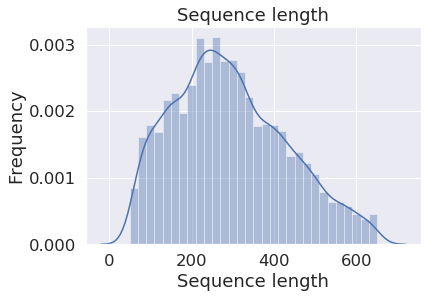

In [34]:
sns.set(font_scale = 1.5)
sns.distplot(lengths, bins=30)
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.title('Sequence length')

Increasing the number of bins will increase the resolution of the plot and may provide valuable insight.
Increasing the bin size will however give a lower granularity and ability to discern trends in the distribution.
A too low number of bins  may hide interesting details in the distribution.

Several methods to finding an ideal bin size have been proposed:

__Square-root of number of samples__

bins = $\sqrt{n}$

__Sturges__

bins = ceil(log2(n)) + 1


__Experimentation is however always advised!__

More informatioin can be found at: https://www.answerminer.com/blog/binning-guide-ideal-histogram

In [35]:
n = len(lengths)
bins_square_root = int(np.sqrt(n))
bins_sturges = int(np.ceil(np.log2(n)) + 1)

print(bins_square_root, bins_sturges)

100 15


#### Try changing the bin size in the above plot and observe the changes in the graph
   

#### Question 5: What is the mean sequence length of the proteins in this dataset?

#### Plotting dataset correlations
Is there a relationship between the sequence length and optimal growth temperature?
An easy way to visualize the correlationship between two sets of values is using Seaborn´s regplot graphing method.

https://seaborn.pydata.org/generated/seaborn.regplot.html

Text(0.5, 1.0, 'Regression plot:\nsequence length vs temperature')

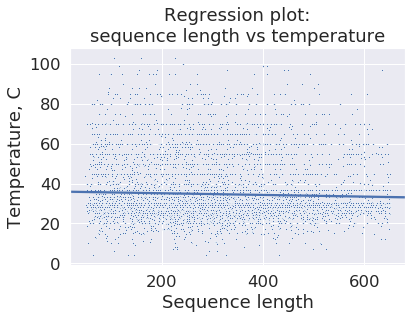

In [39]:
sns.set(font_scale = 1.5)

sns.scatterplot(lengths, y_data, s = 5)
sns.regplot(lengths, y_data, scatter = False)
plt.xlabel('Sequence length')
plt.ylabel('Temperature, C')
plt.title('Regression plot:\nsequence length vs temperature')

#### Note: Seaborn unfortunately does not support giving a numeric value for the regression line plotted above. However we can calculate the Pearson correlation value ourselves using Scipy´s pearsonr method.

#### Exercise: Calculate the pearson correlation between the sequence lengths (lengths) and temperatures (y_data) using Scipy´s pearsonr method. Is there a strong correlation? In which direction? https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [ ]:
#from scipy.stats import pearsonr

#pearson_corr, p_value = pearsonr()

#print("Pearson correlation:", pearson_corr, "\nP-value:", p_value)

#### Question 6: Is the pearson correlation positive or negative?


<img src="img/corr.jpg" alt="Drawing" style="width: 600px;"/>

*** Source: Image from:
https://www.emathzone.com/wp-content/uploads/2014/10/positive-negative-corrrelation.jpg ***

#### Analyzing amino-acid frequencies

#### Since the sequences are not aligned and heterogeneously distributed among different source organism, we need to convert it into something we can more easily analyze. Below we will use a function to count the amino-acid content of each sequence. This process can be extremely slow using regular Python functions. We will therefore use Numba to speed things up. Numba is a high performance python compiler which compiles Python code into far more optimized machine code. Read more: http://numba.pydata.org

In [42]:
from numba import jit

#@jit(nopython=True) #Compile this function into machine-code using Numba
def counter(x):
    counts = np.zeros((len(x), 21))

    for i in range(len(x)): #protein
        for aa in range(0, 21): #aa
            counts[i, aa] = np.sum(x[i] == aa)      
    return counts

**Note that while Numba works on the above function without any changes to the Python code, for more advanced functions this will likely not be the case and may require Numba specific definitions**

In [43]:
counter(X_data)

array([[549.,  11.,   0., ...,   9.,   1.,   1.],
       [513.,  15.,   0., ...,  13.,   4.,   3.],
       [137.,  46.,  10., ...,  32.,   1.,  16.],
       ...,
       [504.,  14.,   1., ...,  13.,   0.,   0.],
       [240.,  53.,   4., ...,  24.,   7.,   6.],
       [489.,   9.,   2., ...,  10.,   2.,  10.]])

We observe below that our amino-acid frequency counter also counts the zeros, which represent missing positions.
If we are only interested in the distribution of the 20 amino-acids, the missing positions should be excluded.

In [44]:
X_data_counted = counter(X_data)[:, 1:] #Remove the first column, representing missing positions

X_data_counted

array([[11.,  0.,  5., ...,  9.,  1.,  1.],
       [15.,  0., 10., ..., 13.,  4.,  3.],
       [46., 10., 24., ..., 32.,  1., 16.],
       ...,
       [14.,  1., 12., ..., 13.,  0.,  0.],
       [53.,  4., 28., ..., 24.,  7.,  6.],
       [ 9.,  2.,  9., ..., 10.,  2., 10.]])

Let´s visualize the distribution of amino-acids in all sequences.

We will demonstrate 3 different chart types:
- Swarmplot
- Boxplot
- Violinplot

Each has its own benefits. Note that for the swarmplot, it quickly becomes computationally expensive to plot all points. For the sake of speed and not overcrowding the plot, we sample only 100 samples.

- The swarmplot plots all points, with no overlap between the plots, therefore giving insight into the underlying distributions of the samples. 
- The boxplot includes common statistical estimates, including the mean, first and third quartile, minimum, maximum and outliers. It does not however show the individual points, except those at the extremes.
- The violinplot, similar to the boxplot, contains statistical estimates, but also visualize the density of the datapoints, revealing the underlying data structure. 

**For more information about visualizing statistical uncertanty, we highly recomment the e-book "Fundamentals of data visualization" by Claus O. Wilke:**

https://serialmentor.com/dataviz/visualizing-uncertainty.html

Read more: https://towardsdatascience.com/visualizing-statistical-plots-with-seaborn-6b6e60ce5e71

In [45]:
# Creating a DataFrame of the amino-acid counts
df = pd.DataFrame(X_data_counted, columns = aa_residues)

# Converting the DataFrame to a "melted" dataframe, for plotting
melt_df = pd.melt(df, var_name = "Amino-acid", value_name="Count")

# Randomly sub-sampling 100 sequences for visualizing the beeswarm distribution,
# in order to speed up plotting
df_sampled = df.sample(n = 100)
melt_df_sampled = pd.melt(df_sampled, var_name = "Amino-acid", value_name="Count")

#### Note: swarmplots takes relatively longer time to plot. Avoid making swarmplots with large sample sizes

**Try plotting each of the 3 graphs below by themselves and in combination,
by adding / removing the comment tags below.**

CPU times: user 928 ms, sys: 0 ns, total: 928 ms
Wall time: 1.04 s


Text(0.5, 1.0, 'Frequency of amino-acids in all sequences')

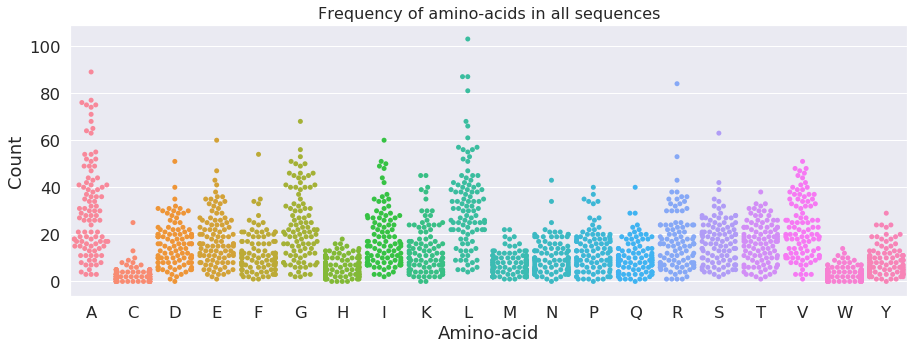

In [46]:
fig, ax = plt.subplots(figsize = (15,5))

# Try plotting of these plots, individually and combined!
sns.swarmplot(x = "Amino-acid", y = "Count", data = melt_df_sampled)
#sns.boxplot(x = "Amino-acid", y = "Count", data = melt_df)
#sns.violinplot(x = "Amino-acid", y = "Count", data = melt_df)

plt.title('Frequency of amino-acids in all sequences', fontsize=16)

#### Try removing / adding the comment hashtags (#), to graph the 3 different distribution plot methods above

## Extracting sequences by own definition of thermophile, mesophiles and cryophiles

Text(0.5, 1.0, 'Distribution of optimal-growth temperatures')

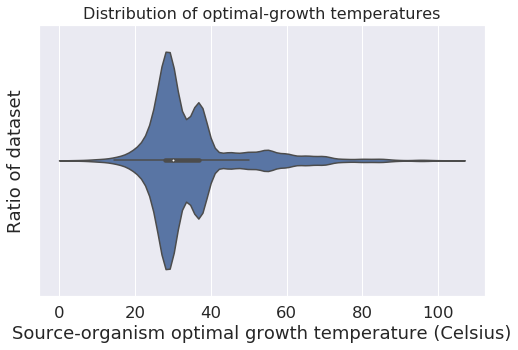

In [47]:
fig, ax = plt.subplots(figsize = (8,5))
sns.violinplot(y_data)

ax.set_xlabel('Source-organism optimal growth temperature (Celsius)')
ax.set_ylabel('Ratio of dataset')
plt.title('Distribution of optimal-growth temperatures', fontsize=16)

Let´s assign 3 temperature groups from our dataset.

- [Thermophiles](https://en.wikipedia.org/wiki/Thermophile), with optimal growth temperature above 45 degrees
- [Mesophiles](https://en.wikipedia.org/wiki/Mesophile), with optimal growth temperatures between 20 and 45 degrees
- [Cryophiles](https://en.wikipedia.org/wiki/Psychrophile), with optimal growth temperature below 20 degrees

These limits are roughly comparable to the limits defined by Prescott, Harley and Klein in Microbiology 7th edition.

<img src="img/growth.png" alt="Drawing" style="width: 600px;"/>

**Image source: Prescott, Harley and Klein Microbiology 7th edition. Image URL:
https://archive.org/details/Microbiology_7_edition_by_Joanne_Willey_Linda_Sherwood_Chris_Woolverton/page/n157**

In [48]:
# y_data
mesophiles_y = y_data[(y_data <= 45) * (y_data >= 20)]
cryophiles_y = y_data[(y_data < 20)]
thermophiles_y = y_data[(y_data > 45)]

# X_data
mesophiles_X = X_data[(y_data <= 45) * (y_data >= 20)]
cryophiles_X = X_data[(y_data < 20)]
thermophiles_X = X_data[(y_data > 45)]

We can calculate the new median temperature of our 3 groups of sequences

In [49]:
np.median(thermophiles_y), np.median(mesophiles_y), np.median(cryophiles_y)

(58.33333333333334, 30.0, 16.0)

In our dataset given the definitions used here, we observe a median optimal growth temperature of:
- thermophiles: 58 degrees
- mesophiles: 30 degrees
- cryophiles: 16 degrees

## Calculating average amino-acid content

It would be interesting to investigate which features of a sequence are associated with the more extremophilic organisms compared to organisms preferring growth at non-extreme temperatures. We will therefore calculate the frequency of amino-acids in the sequences of the 3 groups, and observe whether there are any significant differences.

We will normalize the residue count by the total number of sequences for that temperature group.

*Note: For the sake of simplicity, and since we did not observe any significant relationship between sequence length and temperature, we do not normalize for the sequence length yet when calculating frequency of amino-acids. This will however be done when later calculating the average sequence ratios*

In [50]:
# First count integers for the 20 amino acids (1-20) and missing positions (0),
# then remove the missing positions (first column)
thermophile_count = counter(thermophiles_X)[:, 1:]
mesophile_count = counter(mesophiles_X)[:, 1:]
cryophile_count = counter(cryophiles_X)[:, 1:]

#Sum the count for all sequences for each amino-acid, and normalize by total count
thermophile_count_sum = np.sum(thermophile_count, axis = 0) / len(thermophile_count)
mesophile_count_sum = np.sum(mesophile_count, axis = 0) / len(mesophile_count)
cryophile_count_sum = np.sum(cryophile_count, axis = 0) / len(cryophile_count)


In [51]:
# Create new dataframe with the thermophile residue frequencies,
df = pd.DataFrame(thermophile_count_sum, index = aa_residues, columns = ["Residue"])

# Order dataframe rows from most frequent to least frequent amino-acid
order_descending = df.sort_values(by = "Residue", ascending = False).index

print("Average number of amino-acids in the thermophile sequences:")
df.loc[order_descending]

Average number of amino-acids in the thermophile sequences:


,Residue
L,29.694662
A,23.667616
V,21.429181
G,20.936655
E,20.518861
I,19.543060
K,17.042705
R,16.214947
S,14.823488
D,13.580071


In [52]:
print("Average length of thermophile sequences:")
np.sum(df.values)

Average length of thermophile sequences:


280.4569395017794

Text(0.5, 1.0, 'Average amino-acid frequency count')

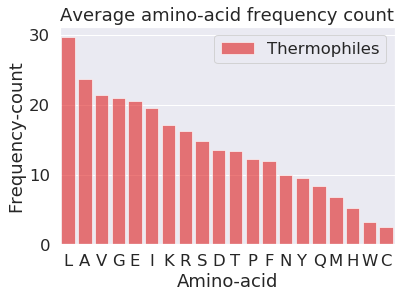

In [53]:
# Create barplot for thermophile average sequence frequency of residues
fig = sns.barplot(x = df.index, y = "Residue", data = df,
            color = 'Red', alpha = .6,
            label = 'Thermophiles',
           order = order_descending)

# Add graph legend, axis labels and title
plt.legend()
fig.set_xlabel('Amino-acid')
fig.set_ylabel('Frequency-count')
plt.title('Average amino-acid frequency count')

#### Now let´s repeat the same with all 3 groups, and compare the barplots in a single graph.

Text(0.5, 1.0, 'Average amino-acid frequency count')

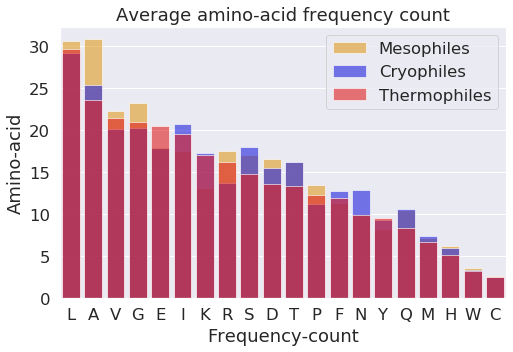

In [54]:
# Initialize plot 
fig, ax = plt.subplots(figsize = (8,5))

# Create dataframes and plot the 3 temperature groups, thermo-, meso- and cryophiles
#Barplot for mesophiles
df1 = pd.DataFrame(mesophile_count_sum, index = aa_residues, columns = ["Residue"])
df1 = df1.loc[order_descending]
ax = sns.barplot(x = df1.index, y = "Residue", data = df1, color = 'Orange',
            alpha = 0.6, label = 'Mesophiles')

#Barplot for cryophiles
df2 = pd.DataFrame(cryophile_count_sum, index = aa_residues, columns = ["Residue"])
df2 = df2.loc[order_descending]
ax = sns.barplot(x = df2.index, y = "Residue", data = df2, color = 'Blue',
            alpha = 0.6, label = 'Cryophiles')

#Barplot for thermophiles
df3 = pd.DataFrame(thermophile_count_sum, index = aa_residues, columns = ["Residue"])
df3 = df3.loc[order_descending]
ax = sns.barplot(x = df3.index, y = "Residue", data = df3, color = 'Red',
            alpha = 0.6, label = 'Thermophiles')

# Add graph legend, axis labels and title
plt.legend()
ax.set_xlabel('Frequency-count')
ax.set_ylabel('Amino-acid')
plt.title('Average amino-acid frequency count')

**From the above bargraph, we observe that:**
- The most common amino-acids in all groups are Leucine, Alanine and Valine.
- The largest difference between the groups seems to be in the Alanine frequencies.
- Residues like glutamine, methionine, histidine, tryptophan and cysteine are relatively rare


We are not fond of overlapping bar charts. It becomes very hard to discern the color of bars hidden behind others. Let´s try to make our graph a little more easy to interpret. 
    
Also, due to the bar lengths not being normalized by sequence lengths, it becomes difficult to visualize the relative changes in frequency between sequences and groups.
    
Let´s see if we find a better way to represent the information in the graph above.

## Graphing changes in amino-acid content

While in the above plot we can observe differences in the average frequency of each amino-acid, what could be more interesting to us is the change in relative frequency per amino-acid. For example, which residues are overrepresented or underrepresented in the thermophiles and cryophiles, compared to mesophiles as a baseline.
    
    
In order to calculate this we first calculate the difference in the frequency counts, and then normalize the difference by the average frequency of that amino-acid. This gives us the percent change in residue frequency from the mesophile baseline frequency.

In [55]:
def average_sequence_content(df):
    # Calculates amino-acid frequency per sequence,
    # calculate residue ratio per sequence (% content),
    # then calculate average ratio for all sequences (avg % content)
    counts = counter(df)[:, 1:]
    sequence_ratio = counts / counts.sum(axis = 1).reshape(-1, 1)
    average_sequence_ratio = np.sum(sequence_ratio, axis = 0) / len(df)
    return(average_sequence_ratio)

In [56]:
#Mesophiles vs thermophilees
change_thermophiles = ((average_sequence_content(thermophiles_X) - average_sequence_content(mesophiles_X))
            / average_sequence_content(thermophiles_X) * 100)
change_thermophiles = np.round(change_thermophiles, 1)
df_thermophiles = pd.DataFrame({"Percent change": change_thermophiles, "Amino-acids": aa_residues})

#Find order for ascending percent change for thermophiles
order_ascending = df_thermophiles.sort_values(by = "Percent change", ascending=False).index

#Mesophiles vs cryophiles
change_cryophiles = ((average_sequence_content(cryophiles_X) - average_sequence_content(mesophiles_X))
            / average_sequence_content(cryophiles_X) * 100)
change_cryophiles = np.round(change_cryophiles, 1)
df_cryophiles = pd.DataFrame({"Percent change": change_cryophiles, "Amino-acids": aa_residues})

In [57]:
print("Relative amino-acid content change in cryophiles vs mesophiles")
df_cryophiles

Relative amino-acid content change in cryophiles vs mesophiles


,Percent change,Amino-acids
0,-17.7,A
1,-1.0,C
2,-5.3,D
3,0.2,E
4,12.5,F
5,-12.8,G
6,-5.9,H
7,17.0,I
8,25.4,K
9,-2.2,L


Now that we have the percent residue change for both cryophiles and thermophiles vs mesophiles, we merge both into a single dataframe and keep track of which group the values belong to by adding a new column.

The Group column will later be used by Seaborn to give the correct color to the bar plot while graphing.

In [58]:
# Combining data into single dataframe
melt_df = pd.concat((df_thermophiles, df_cryophiles))

# Adding "group" label to keep track of which residue percent change belongs to which organism group
melt_df["Group"] = np.repeat(["Thermophiles", "Cryophiles"], 20)

# Order residues
melt_df = melt_df.loc[order_ascending]

In [59]:
melt_df

,Percent change,Amino-acids,Group
8,25.5,K,Thermophiles
8,25.4,K,Cryophiles
19,17.3,Y,Thermophiles
19,9.1,Y,Cryophiles
3,15.6,E,Thermophiles
3,0.2,E,Cryophiles
7,14.9,I,Thermophiles
7,17.0,I,Cryophiles
4,11.0,F,Thermophiles
4,12.5,F,Cryophiles


Let us graph the changes using Seaborn´s barplot function.

We will also use a custom function from Secant Zhang posted on StackOverflow in order to display the values on the bargraph.

In [60]:
from scripts.plotting_scripts import *
# show_values_on_bars:
# Custom adapted function for displaying values on bar graphs
# Original credit to Secant Zhang, Jun 26 2019
# "Seaborn Barplot - Displaying Values", StackOverflow
# URL: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

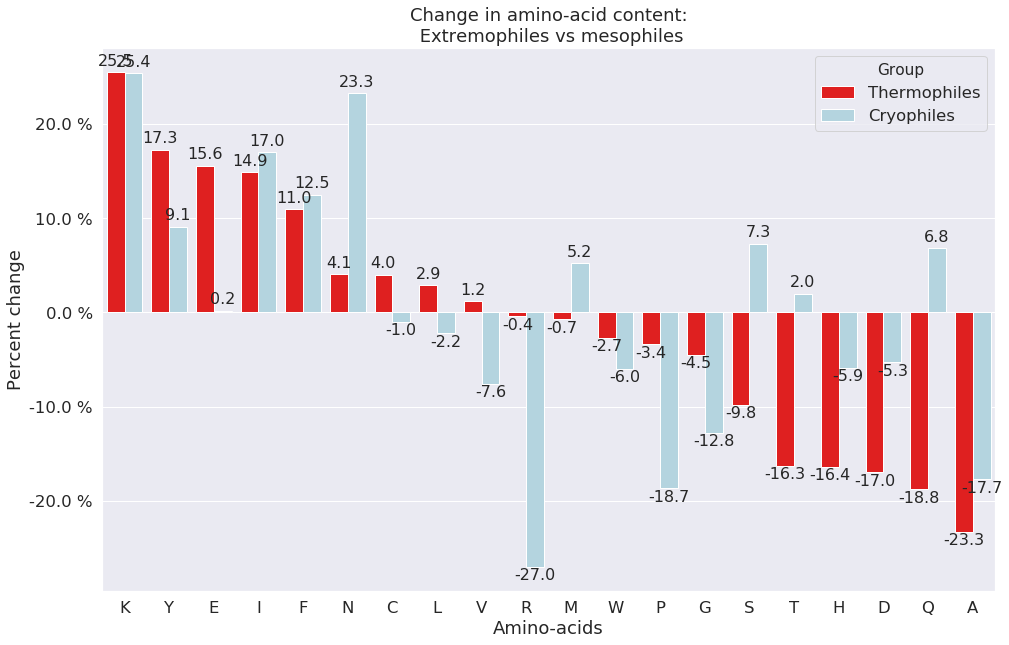

In [61]:
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

colors = ["Red", "lightblue"]
fig, ax = plt.subplots(figsize = (16,10))
fig = sns.barplot("Amino-acids", "Percent change", hue="Group",
            palette = colors, data=melt_df)
plt.title('Change in amino-acid content:\n Extremophiles vs mesophiles')

# Use custom function to show values of bars
show_values_on_bars(fig, "v", fontsize = 16, space = 0.7)

# Manipulate y-axis
y_values = ax.get_yticks()
ax.set_yticklabels([(str(y) + " %") for y in y_values])

# Save plot
plt.savefig("extremophile_amino_content.png")

In our analysis we observe these differences in the extremophiles compared to mesophiles:
- **Thermophiles** have a higher content of Lysine (+ 26%), Tyrosine (+ 17 %), Glutamate (+ 16 %) and Isoleucines (+ 15 %)
- **Thermophiles** have a lower content of Alanine (- 23 %), Glutamic acid (- 19 %), Aspartic acid (- 17 %), Histidines (- 16 %) and Threonines (- 16 %)

- **Cryophiles** have a higher content of Lysines (+ 25 %), Asparagines (+ 23 %) and Isoleucines (+ 17 %)
- **Cryophiles** have a lower content of Arginine (- 27 %), Proline (- 19 %) and Alanines (- 18 %)

- **Cryophiles compared to thermophiles** have significantly higher Glutamic acid (+ 25 %) and Serine (+ 17 %) content, and significantly lower Arginine content (ca -27 %)

Note that since we only used a proxy of the given optimal growth temperature for assigning the proteins to the 3 groups, we do not actually know the true label for the protein sequences. Also without knowing more about the source of the dataset and how the values were calculated, we should not assign too much weight to the calculated percentages here.

**Are our findings in agreement with the scientific literature consensus on amino-acid differences between the temperature groups?**

**Read more: Devi et al, 2013, Comparative analysis of amino acid sequences from mesophiles and thermophiles in respective of carbon–nitrogen hydrolase family.
URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3824785/**


__Final summary:__

Finally we have:
- Imported and processed data using numpy
- Translated sequences into amino-acid sequences
- Extracted datapoints directly from a plot and used them to annotate interesting areas
- Plotted dataset correlations
- Visualized scatterplot, lineplot, boxplot and violinplots in Seaborn
- Calculated and plotted amino-acid frequncies
- Shown distribution and difference in frequency of amino-acids between thermo, meso and cryophiles

#### Read more:
- Introduction to NumPy: http://cs231n.github.io/python-numpy-tutorial/
- Seaborn plotting tutorial: https://seaborn.pydata.org/tutorial.html
- Introduction to matplotlib in Python: https://towardsdatascience.com/introduction-to-matplotlib-in-python-5f5a9919991f


### Notebook for [Biodatascience101.github.io](https://biodatascience101.github.io) - Simple and effective biological data science training
### By [Magnus Haraldson Høie](https://twitter.com/magnushoie) and [Andreas Fønss Møller](https://github.com/foenssmoeller)